In [ ]:
%matplotlib inline
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KernelKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# Keep first 3 classes
X_train = X_train[y_train < 4]
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
sz = X_train.shape[1]

gak_km = KernelKMeans(n_clusters=3,
                      kernel="gak",
                      kernel_params={"sigma": "auto"},
                      n_init=20,
                      verbose=True,
                      random_state=seed)
y_pred = gak_km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [ ]:
pip install tslearn

In [ ]:
pip install scikit-learn-extra

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/unique and IF.csv')

In [ ]:
#kmeans = KMeans(n_clusters = 5, , random_state = 1)
#y_kmeans = kmeans.fit_predict(X)
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=5, metric='manhattan',random_state=0)
y_kmeans = kmedoids.fit(X)


In [ ]:
kmedoids.labels_
kmedoids.predict([[0,0], [4,4]])
kmedoids.cluster_centers_
kmedoids.inertia_


In [ ]:
pip install pyclustering

     |████████████████████████████████| 2.6 MB 4.0 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=e1626e8a75425d6a38970ecc2260af5648ddd4161ca367445eee70baad0e69cb
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


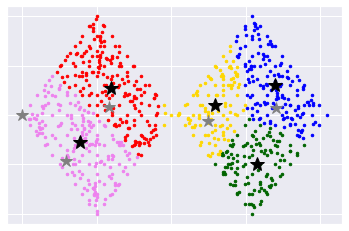

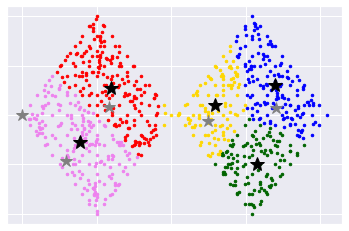

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

# Load list of points for cluster analysis.
sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)

# Initialize initial medoids using K-Means++ algorithm
initial_medoids = kmeans_plusplus_initializer(sample, 5).initialize(return_index=True)

# Create instance of K-Medoids (PAM) algorithm.
kmedoids_instance = kmedoids(sample, initial_medoids)

# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Print allocated clusters.
#print("Clusters:", clusters)

# Display clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.append_cluster(initial_medoids, sample, markersize=12, marker='*', color='gray')
visualizer.append_cluster(medoids, sample, markersize=14, marker='*', color='black')
visualizer.show()

In [ ]:
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):
        '''
        Class constructor
        Parameters
        ----------
        - k: number of clusters.
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []

In [ ]:
pip install fuzzy-c-means

     |████████████████████████████████| 15.7 MB 56 kB/s 
     |████████████████████████████████| 10.1 MB 45.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/unique and IF.csv')

In [ ]:
fcm = FCM(n_clusters=5)
fcm.fit(X)

ValidationError: ignored

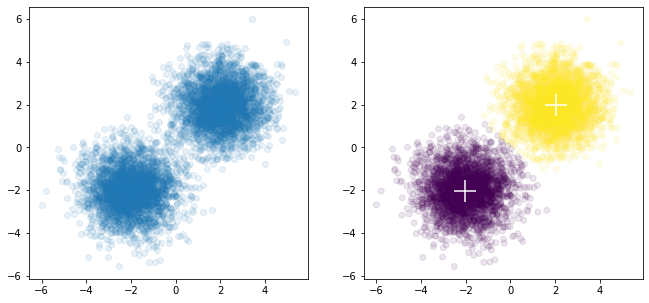

In [ ]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()
